In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data is from data.gov
https://catalog.data.gov/dataset/stds-in-california-by-disease-county-year-and-sex-18f64

In [3]:
caldf = pd.read_csv("Calstdinfo.csv")
caldf

,Disease,County,Year,Sex,Cases,Population,Rate,Lower 95% CI,Upper 95% CI,Annotation Code
0,Chlamydia,California,2001,Female,75941.0,17339700,438.0,434.9,441.1,NaN
1,Chlamydia,California,2001,Male,24885.0,17173042,144.9,143.1,146.7,NaN
2,Chlamydia,California,2001,Total,101590.0,34512742,294.4,292.6,296.2,NaN
3,Chlamydia,California,2002,Female,81584.0,17554666,464.7,461.6,467.9,NaN
4,Chlamydia,California,2002,Male,28521.0,17383624,164.1,162.2,166.0,NaN
...,...,...,...,...,...,...,...,...,...,...
11146,Gonorrhea,Yuba,2020,Male,103.0,41382,248.9,203.2,301.8,NaN
11147,Gonorrhea,Yuba,2020,Total,192.0,81706,235.0,203.0,270.6,NaN
11148,Gonorrhea,Yuba,2021,Female,89.0,40644,219.0,175.9,269.4,NaN
11149,Gonorrhea,Yuba,2021,Male,90.0,41567,216.5,174.1,266.1,NaN


In [5]:
unique_counties = caldf['County'].unique()
print(unique_counties)

['California' 'Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


In [7]:
year_counts = caldf['Year'].value_counts()
print(year_counts)

2008    531
2004    531
2007    531
2014    531
2006    531
2021    531
2013    531
2005    531
2020    531
2012    531
2019    531
2016    531
2011    531
2003    531
2018    531
2010    531
2002    531
2017    531
2009    531
2001    531
2015    531
Name: Year, dtype: int64


In [11]:
#Want disease as Chlamydia and year as 2020
df_F = caldf[(caldf['Disease'] == 'Chlamydia') & (caldf['Year'] == 2020)]

# Male and Female Data
maledf = df_F[df_F['Sex'] == 'Male']
femaledf = df_F[df_F['Sex'] == 'Female']


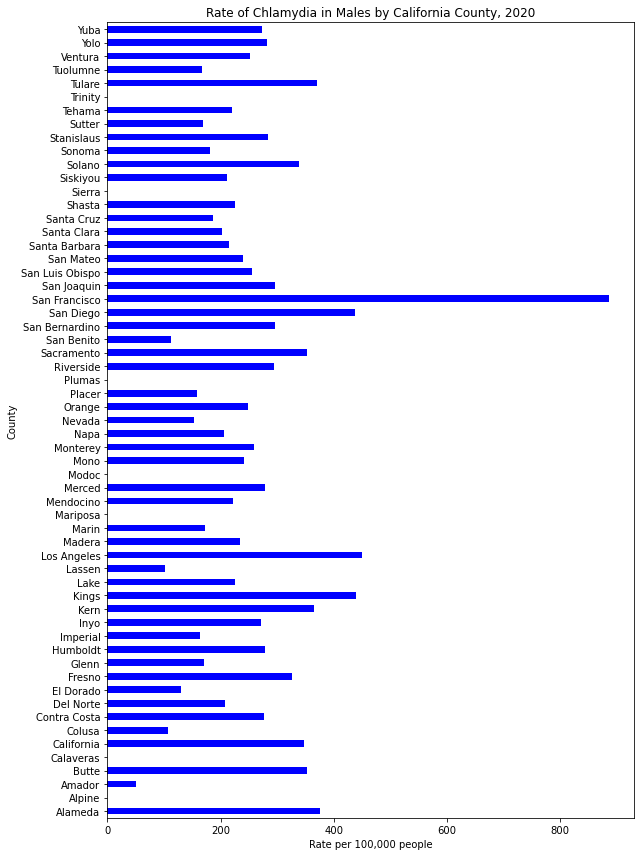

In [28]:
#For the Males
male_rates = maledf.groupby('County')['Rate'].sum()  

plt.figure(figsize=(9,12))
male_rates.plot(kind='barh', color='blue')  # Changed 'bar' to 'barh' for horizontal bars
plt.title('Rate of Chlamydia in Males by California County, 2020')
plt.xlabel('Rate per 100,000 people')
plt.ylabel('County')
plt.tight_layout()
plt.show()

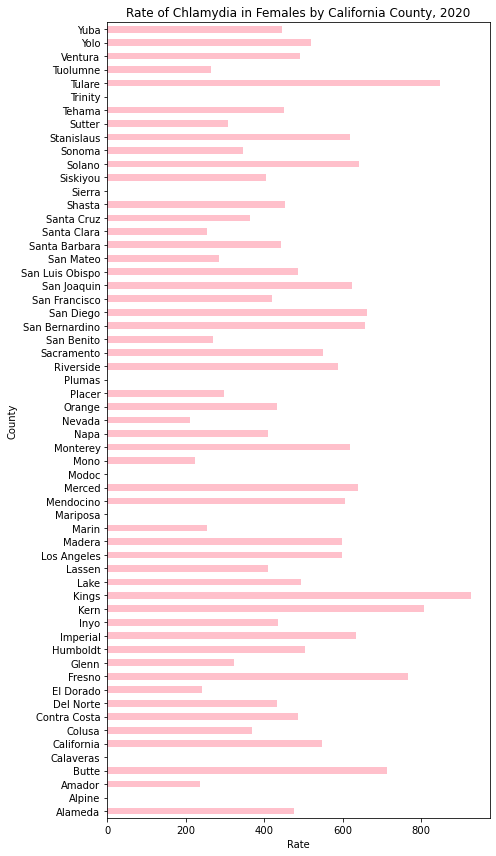

In [27]:
#For the females
female_rates = femaledf.groupby('County')['Rate'].sum()

plt.figure(figsize=(7, 12))
female_rates.plot(kind='barh', color='pink') 
plt.title('Rate of Chlamydia in Females by California County, 2020')
plt.xlabel('Rate')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [29]:
#Let's just look at males in SF over time
sf_males = caldf[(caldf['Sex'] == 'Male') & (caldf['County'] == 'San Francisco') & 
                 (caldf['Year'] >= 2001) & (caldf['Year'] <= 2021)]

sf_male_rates_by_year = sf_males.groupby('Year')['Rate'].sum()  

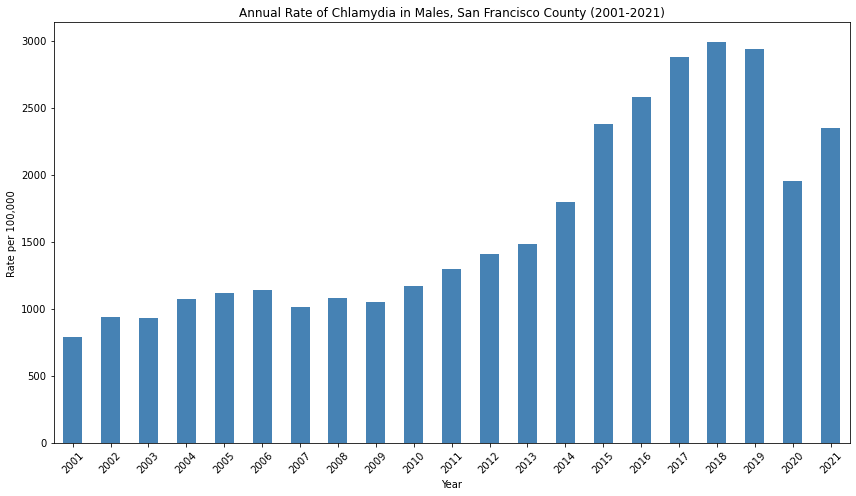

In [36]:
plt.figure(figsize=(12, 7))
sf_male_rates_by_year.plot(kind='bar', color='steelblue')
plt.title('Annual Rate of Chlamydia in Males, San Francisco County (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()